# A comprehensive beginner’s guide to create a Time Series Forecast 

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot 
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
%matplotlib inline
import datetime

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 372F-3690

 Directory of C:\Users\USER\Documents\Py_Project\Time_Series

12/12/2017  10:50 AM    <DIR>          .
12/12/2017  10:50 AM    <DIR>          ..
12/12/2017  09:39 AM    <DIR>          .ipynb_checkpoints
12/12/2017  10:50 AM            64,738 a Time Series Forecast.ipynb
12/11/2017  03:13 PM             1,746 AirPassengers.csv
               2 File(s)         66,484 bytes
               3 Dir(s)  15,144,030,208 bytes free


In [3]:
data = pd.read_csv("AirPassengers.csv")

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.shape
print ("Data types:")
data.dtypes

Data types:


Month          object
#Passengers     int64
dtype: object

#### The data contains a particular month and number of passengers travelling in that month. But this is still not read as a TS object as the data types are ‘object’ and ‘int’. In order to read the data as a time series, we have to pass special arguments to the read_csv command:



In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
type(dateparse)

function

In [20]:
data = pd.read_csv('AirPassengers.csv', index_col='Month',date_parser=dateparse)
print (data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


##### Let’s understand the arguments one by one:

- parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.
- index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting (biến mô tả) date-time information. So this argument tells pandas to use the ‘Month’ column as index.
- date_parser: This specifies a function which converts an input string into datetime variable. Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.

In [8]:
print ("Data types:")
data.dtypes

Data types:


#Passengers    int64
dtype: object

Now we can see that the data has time object as index and #Passengers as the column. We can cross-check the datatype of the index with the following command:



In [9]:
data.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [10]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
ts = data["#Passengers"] 

In [12]:
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
             ... 
1958-07-01    491
1958-08-01    505
1958-09-01    404
1958-10-01    359
1958-11-01    310
1958-12-01    337
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960

In [13]:
#1. Specific the index as a string constant:
ts['1949-01-01']

#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]

112

* Both would return the value ‘112’ which can also be confirmed from previous output. Suppose we want all the data upto May 1949. This can be done in 2 ways:



In [14]:
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [15]:
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

### There are 2 things to note here:

- Unlike numeric indexing, the end index is included here. For instance, if we index a list as a[:5] then it would return the values at indices – [0,1,2,3,4]. But here the index ‘1949-05-01’ was included in the output.
- The indices have to be sorted for ranges to work. If you randomly shuffle the index, this won’t work.

In [16]:
ts['1949']


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

The month part was omitted. Similarly if you all days of a particular month, the day part can be omitted.



In [17]:
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

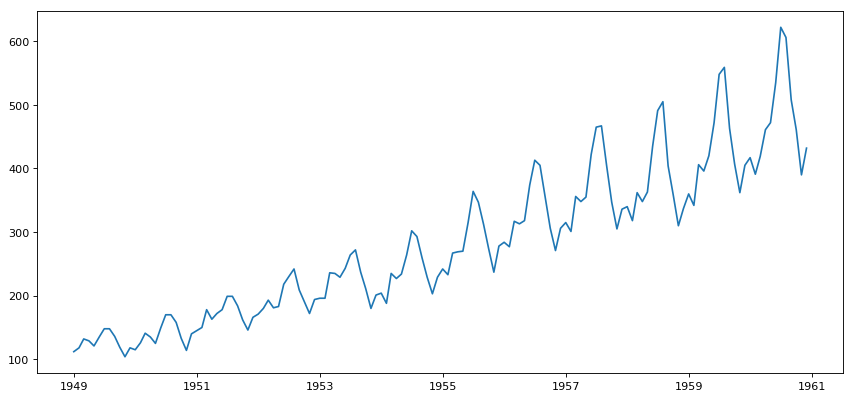

In [18]:
plt.figure(num=None,figsize=(13,6),dpi=80,facecolor='w',edgecolor='k')
plt.plot(ts)

### Figure - Matplotlib 
- https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure

### it is clearly evident that there is an overall increasing trend in the data along with some seasonal variations.